In [1]:
import numpy as np

In [54]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [9]:
from sklearn import datasets,linear_model


In [44]:
from sklearn.metrics import mean_squared_error

In [10]:
#loading dataset

diabetes=datasets.load_diabetes()


In [18]:
#looking how data is stored in file
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [20]:
#seeing the description of our dataset
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [21]:
#taking only one feature so that we can plot avg line of linear regresion
diabetes_x=diabetes.data[:,np.newaxis,2]


In [22]:
#printing the feature of column 2 only we will make our regression from it so that we will see that avg best fit line
print(diabetes_x)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [25]:
#slicing the data so that we can see it properly on graph
#taking last 30 item for training
diabetes_x_train=diabetes_x[:-30]

#taking first 20 for testing
diabetes_x_test=diabetes_x[-20:]

In [26]:
print(diabetes_x_train)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [27]:
print(diabetes_x_test)


[[ 0.07786339]
 [-0.03961813]
 [ 0.01103904]
 [-0.04069594]
 [-0.03422907]
 [ 0.00564998]
 [ 0.08864151]
 [-0.03315126]
 [-0.05686312]
 [-0.03099563]
 [ 0.05522933]
 [-0.06009656]
 [ 0.00133873]
 [-0.02345095]
 [-0.07410811]
 [ 0.01966154]
 [-0.01590626]
 [-0.01590626]
 [ 0.03906215]
 [-0.0730303 ]]


In [28]:
#labels on y axis
diabetes_y_train=diabetes.target[:-30]
diabetes_y_test=diabetes.target[-20:]

In [32]:
#making linear model to predict the label using feature
model=linear_model.LinearRegression()

In [33]:
#fitting the data in model
#model.fit(train,test)
model.fit(diabetes_x_train,diabetes_y_train)

LinearRegression()

In [35]:
#testing the model
diabetes_y_predict=model.predict(diabetes_x_test)

In [48]:
#calculating error using mean square error
#from sklearn.metrics import mean_squared_error
#predicted-actual error ka square ka average
y=mean_squared_error(diabetes_y_test,diabetes_y_predict)
print(f"mean squared error is : {y}" )


mean squared error is : 2561.3204277283867


***plotting***

In [51]:
#printing weight that is slope of line and intercept;
print("weight: ",model.coef_)

weight:  [941.43097333]


In [53]:
print("intercept :",model.intercept_)

intercept : 153.39713623331698


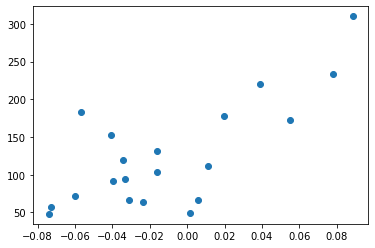

In [56]:
#scatter plot
plt.scatter(diabetes_x_test,diabetes_y_test)

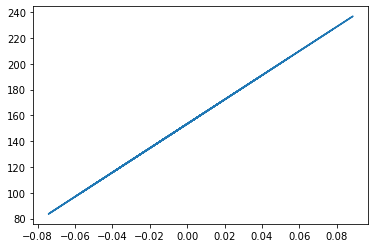

In [57]:
plt.plot(diabetes_x_test,diabetes_y_predict)

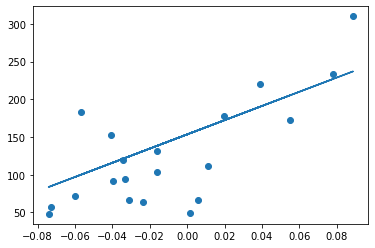

In [58]:
plt.scatter(diabetes_x_test,diabetes_y_test)
plt.plot(diabetes_x_test,diabetes_y_predict)
plt.show()

****the above was a linear model using one feature , we did slicing of column 2 for taking one feature****


# model 2

In [63]:
diabetes_x2=diabetes.data

In [65]:
diabetes_x2_train=diabetes_x2[:-30]

In [66]:
diabetes_x2_test=diabetes_x2[-30:]

In [69]:
diabetes_y2_train=diabetes.target[:-30]
diabetes_y2_test=diabetes.target[-30:]

In [70]:
print(diabetes_x2)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [71]:
print(diabetes_x2_train)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [-0.05273755  0.05068012 -0.01159501 ...  0.07120998  0.03056649
  -0.0052198 ]
 [-0.00914709  0.05068012 -0.0277622  ...  0.03430886  0.06604821
  -0.04249877]
 [ 0.00538306 -0.04464164  0.05846277 ... -0.0763945  -0.05140054
  -0.02593034]]


In [72]:
print(diabetes_y2_train)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

***preparing model***

In [77]:
model2=linear_model.LinearRegression()

***model prepared now to fit the data in model to train the model ***


In [78]:
model2.fit(diabetes_x2_train,diabetes_y2_train)

LinearRegression()

***data fitted in model plus model trained***


**now testing the model**

In [95]:
diabetes_y2_predicted=model2.predict(diabetes_x2_test)

In [97]:
print(diabetes_y2_predicted)

[234.04069476 122.92246614 166.35433115 174.39222892 226.94851442
 151.82190227 100.94358512  83.08956073 143.1298667  192.67823683
 197.98434449 154.37965196 173.16544327 112.38886823 164.20528828
 131.63666326 258.66439447 101.4126313  117.87101994 123.5370635
 219.5123662   62.09123359 133.09435929 121.33048447  53.51502538
 193.125764   104.69007361 123.68983031 211.27336049  53.87045485]


In [82]:
print(diabetes_y2_test)

[261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111. 152.
 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104. 132.
 220.  57.]


In [84]:
y2=mean_squared_error(diabetes_y2_test,diabetes_y2_predicted)
print(f"mean squared error of model2 :{y2}")

mean squared error of model2 :1826.5364191345423


In [85]:
print("weight : ",model2.coef_)

weight :  [  -1.16924976 -237.18461486  518.30606657  309.04865826 -763.14121622
  458.90999325   80.62441437  174.32183366  721.49712065   79.19307944]


In [88]:
print("intercept : ",model2.intercept_)

intercept :  153.05827988224112


# comparing model1 and model 2


In [92]:
#error in model  is y
#error in model2 is y2
if(y>y2):
    print("model2 is better")
else:
    print("model1 is better")

model2 is better
